In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import math

# Confidence intervals

- lower limit
    - $ [\overline{x} - Z_{\frac{a}{2}}\frac{\sigma}{\sqrt{n}}] $
- higher limit
    - $ [\overline{x} + Z_{\frac{a}{2}}\frac{\sigma}{\sqrt{n}}] $

In [2]:
data = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                  140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                  147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                  150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                  154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                  157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                  161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                  164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                  168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                  171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                  178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

<AxesSubplot: ylabel='Count'>

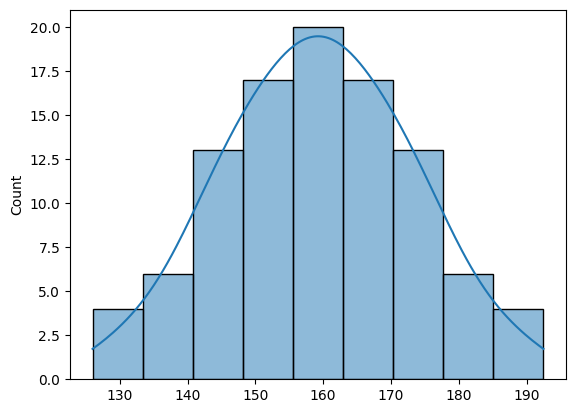

In [11]:
sns.histplot(data, kde=True)

Manual approach

In [15]:
def confidence_interval(confidence, data):
    n = len(data) - 1
    mean = np.mean(data)
    std = np.std(data)

    conf = 1 - confidence
    alpha = conf / 2
    z = stats.norm.ppf(1 - alpha) #gets z from the Z table
    lower_limit = mean - z * (std/math.sqrt(n))
    higher_limit = mean + z * (std/math.sqrt(n))

    # lower limit, higher limit, margin of erro
    return lower_limit, higher_limit, higher_limit - mean

In [16]:
confidence_interval(0.95, data)

(156.5611712378229, 161.9388287621771, 2.68882876217711)

Using scipy library
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

$ \frac{\sigma}{\sqrt{n}} $ = stats.sem

In [12]:
stats.sem(data)

1.3718766178288244

In [14]:
intervals = stats.norm.interval(0.95, np.mean(data), stats.sem(data))
intervals

(156.5611712378229, 161.9388287621771)

In [18]:
# margin of erro
intervals[1] - np.mean(data)

2.68882876217711

In [19]:
salary = np.array([82.1191, 72.8014, 79.1266, 71.3552, 59.192 , 79.1952, 56.518 ,
                    70.3752, 73.5364, 61.0407, 64.3902, 66.4076, 63.5215, 71.9936,
                    60.1489, 78.5932, 76.0459, 67.7726, 64.6149, 80.1948, 76.7998,
                    76.1831, 80.7065, 62.4953, 57.204 , 62.5408, 80.0982, 63.287 ,
                    66.5826, 79.3674])

In [20]:
confidence_interval(0.95, salary)

(67.26506308375339, 73.01545024957993, 2.875193582913269)

In [21]:
stats.norm.interval(0.95, np.mean(salary), stats.sem(salary))

(67.26506308375339, 73.01545024957993)

## T Student distribution

- Recomended for sampĺes with length equal or less than 30
- Higher than 30, it's recomended to use normal distribution

In [22]:
data_t = np.array([149. , 160., 147., 189., 175., 168., 156., 160., 152.])

In [25]:
intervals_t = stats.t.interval(0.95, len(data_t) - 1, np.mean(data_t), stats.sem(data_t, ddof=0))
intervals_t

(151.9488554388298, 171.60670011672573)

In [26]:
# margin of erro
intervals_t[1] - np.mean(data_t)

9.828922338947962